In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [299]:
df_main = pd.read_excel("ML.xlsx")

In [301]:
df_main

,Age,IOP,vCD,hCD,RimArea,DiscArea,CupVol,CupArea,RimVol,NH_Vol,...,IT_rnfl,TL_rnfl,AvGCC_t,AvSupGCC_t,AvInfGCC_t,FLV%,GLV%,MD_vft,PSD_vft,Dx_Hos
0,20,16,0.87,0.97,0.64,2.55,1.129,1.92,0.041,0.447,...,141,61,99.33,98.10,100.58,0.421,0.995,0.43,1.32,Normal
1,20,15,0.96,0.99,0.34,2.66,0.681,2.32,0.037,0.653,...,139,71,94.32,95.87,92.77,0.014,3.276,-0.03,2.34,Normal
2,70,22,1.00,1.00,0.04,2.21,1.003,2.17,0.000,0.001,...,82,39,63.04,65.19,60.88,7.898,34.271,-19.33,6.45,Glaucoma
3,70,19,0.99,0.99,0.09,1.83,0.644,1.75,0.003,0.003,...,88,34,56.59,63.00,50.19,11.772,40.189,-31.21,13.32,Glaucoma
4,33,21,0.68,0.88,0.81,1.75,0.526,0.94,0.071,0.132,...,129,65,92.22,90.55,93.89,0.291,4.762,-0.45,1.99,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,50,13,0.78,0.93,0.64,1.85,0.306,1.21,0.044,0.080,...,129,94,107.24,111.42,103.08,1.425,1.772,0.09,2.39,Normal
601,21,14,0.74,0.94,0.84,2.78,0.355,1.94,0.070,0.153,...,162,69,99.53,100.91,98.15,0.071,1.036,-0.53,1.60,Normal
602,19,12,0.81,0.84,0.99,2.49,0.335,1.50,0.120,0.190,...,162,86,100.38,100.51,102.26,0.262,1.212,0.34,1.76,Normal
603,60,18,0.76,0.82,0.72,1.25,0.102,0.53,0.039,0.078,...,116,72,84.00,83.80,84.21,0.665,11.896,-10.40,5.34,Glaucoma


In [304]:
df_main['Dx_Hos'].value_counts()

Dx_Hos
Glaucoma    361
Normal      244
Name: count, dtype: int64

In [306]:
# Grouping columns
groups = {
    'Intraocular Pressure': ['IOP'],
    'Cup-Disc Ratios and Areas': ['vCD', 'hCD', 'RimArea', 'DiscArea', 'CupVol', 'CupArea', 'RimVol', 'NH_Vol'],
    'Retinal Nerve Fiber Layer (RNFL) Thickness': ['AvRNFL_t', 'AvSUP_t', 'AvINF_t', 'AvNAS_t', 'AvTEMP_t'],
    'Segmented RNFL Thickness': ['TU_rnfl', 'ST_rnfl', 'SN_rnfl', 'NU_rnfl', 'NL_rnfl', 'IN_rnfl', 'IT_rnfl', 'TL_rnfl'],
    'Ganglion Cell Complex (GCC) Thickness': ['AvGCC_t', 'AvSupGCC_t', 'AvInfGCC_t'],
    'Ganglion Cell Complex Loss': ['FLV%', 'GLV%']
}
selected_group = groups['Ganglion Cell Complex (GCC) Thickness']
selected_cols = ['IOP','DiscArea','Age','AvGCC_t', 'AvSupGCC_t', 'AvInfGCC_t','FLV%', 'GLV%']
df = df_main[selected_cols]

In [308]:

# Load and preprocess data
X = df
y = df_main['Dx_Hos']


# Normalize the data
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)


In [310]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [312]:
# Correcting the imbalance

smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [314]:
X_train_res.describe()

,IOP,DiscArea,Age,AvGCC_t,AvSupGCC_t,AvInfGCC_t,FLV%,GLV%
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,18.113879,2.452441,44.435943,89.281931,89.784669,88.694988,2.721133,9.958486
std,6.445536,0.604758,15.589097,12.571609,12.753955,13.092539,3.957739,10.584229
min,10.000000,0.480000,9.000000,49.240000,51.020000,45.470000,0.000000,0.000000
25%,14.000000,2.060000,33.000000,83.797500,83.087500,82.330000,0.295500,1.910099
50%,16.000000,2.425000,45.000000,91.975000,92.388276,91.355000,0.938500,5.778500
75%,20.000000,2.820000,56.000000,98.957500,99.077400,98.515000,3.355000,13.743000
max,48.000000,4.320000,85.000000,119.010000,119.320000,118.720000,27.322000,45.347000


In [316]:

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=len(X.columns.values), activation='relu'))  # Input layer with 30 features and a hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and get the history
history = model.fit(X_train_res, y_train_res, epochs=200, batch_size=512, validation_split=0.2, shuffle=True)


Epoch 1/200


C:\Users\Laudkyle\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3408 - loss: 2.5822 - val_accuracy: 0.0796 - val_loss: 2.4623
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2806 - loss: 1.8992 - val_accuracy: 0.1150 - val_loss: 2.9393
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4053 - loss: 1.7802 - val_accuracy: 0.1416 - val_loss: 2.3943
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4410 - loss: 1.4516 - val_accuracy: 0.2832 - val_loss: 1.4439
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4655 - loss: 1.0405 - val_accuracy: 0.5133 - val_loss: 0.7387
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5167 - loss: 0.8336 - val_accuracy: 0.7345 - val_loss: 0.4870
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5568 - loss: 0.8285 - val_accuracy: 0.7788 - val_loss: 0.4485
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6303 - loss: 0.7662 - val_accuracy: 0.6991 - val_loss: 0.5102
Epoch 

In [317]:

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7922 - loss: 0.3477 
Test Loss: 0.36837536096572876
Test Accuracy: 0.7851239442825317


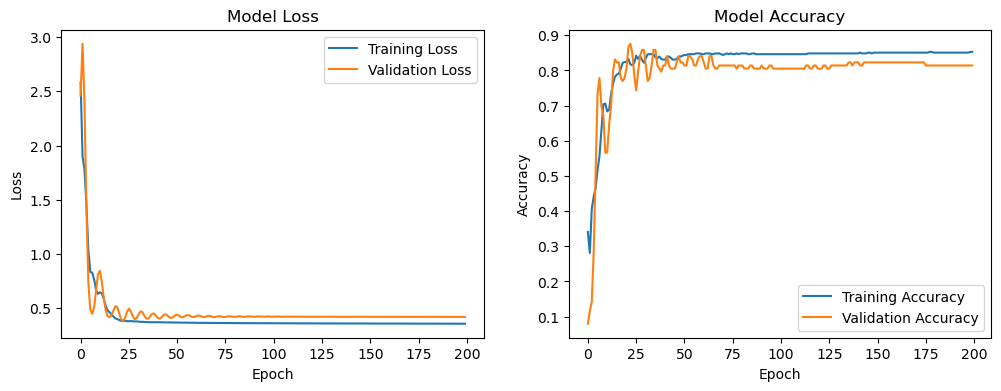

In [318]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.show()

In [258]:
model.save('eye_85.h5')
joblib.dump(y_encoder, 'label_encoder.pkl')

NameError: name 'joblib' is not defined